# caption fine tuning

Following the huggingface tutorial [Image captioning](https://huggingface.co/docs/transformers/main/tasks/image_captioning)
which fine tunes an impage caption model.

In [4]:
from datasets import load_dataset

DATA_DIR = "data"

ds = load_dataset("lambdalabs/pokemon-blip-captions", cache_dir=DATA_DIR)
ds

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/833 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 833
    })
})

In [5]:
ds = ds["train"].train_test_split(test_size=0.1)
train_ds = ds["train"]
test_ds = ds["test"]

# Examine Dataset

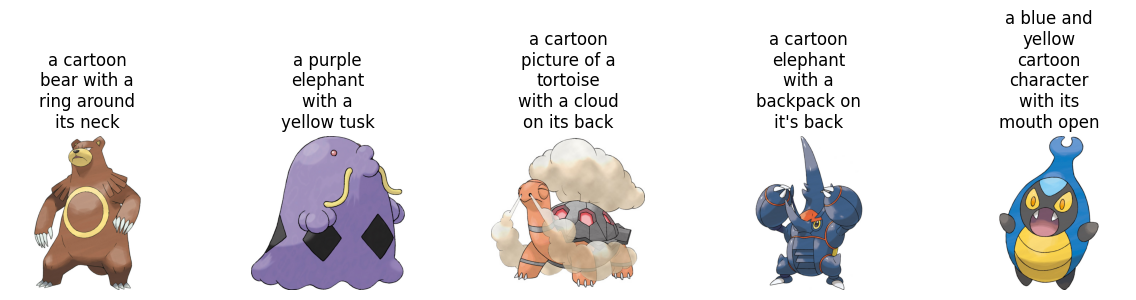

In [14]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images: list, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(images[i])
        plt.axis("off")

# sample_images_to_visualize = [np.array(train_ds[i]["image"]) for i in range(5)]
# sample_captions = [train_ds[i]["text"] for i in range(5)]
# plot_images(sample_images_to_visualize, sample_captions)

it = iter(train_ds)

nrows, ncols = 1, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
for i in range(0, ncols):
    sample = next(it)
    ax = axes[i]
    ax.axis('on')
    caption = sample['text']
    caption = "\n".join(wrap(caption, 12))
    ax.set_title(caption)
    ax.axis("off")
    ax.imshow(sample['image'])
plt.show()
